In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
penl = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\pen-local-unsupervised-ad.csv', header = None)

In [3]:
penl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47.0,100.0,27.0,81.0,57.0,37.0,26.0,0.0,0.0,23.0,56.0,53.0,100.0,90.0,40.0,98.0,n
1,0.0,89.0,27.0,100.0,42.0,75.0,29.0,45.0,15.0,15.0,37.0,0.0,69.0,2.0,100.0,6.0,n
2,0.0,57.0,31.0,68.0,72.0,90.0,100.0,100.0,76.0,75.0,50.0,51.0,28.0,25.0,16.0,0.0,n
3,0.0,100.0,7.0,92.0,5.0,68.0,19.0,45.0,86.0,34.0,100.0,45.0,74.0,23.0,67.0,0.0,o
4,0.0,67.0,49.0,83.0,100.0,100.0,81.0,80.0,60.0,60.0,40.0,40.0,33.0,20.0,47.0,0.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,17.0,63.0,6.0,20.0,51.0,0.0,95.0,28.0,100.0,72.0,55.0,100.0,0.0,91.0,0.0,52.0,n
6720,0.0,82.0,9.0,59.0,56.0,34.0,41.0,0.0,10.0,30.0,3.0,67.0,42.0,96.0,100.0,100.0,n
6721,100.0,98.0,60.0,100.0,24.0,87.0,3.0,58.0,35.0,51.0,58.0,26.0,36.0,0.0,0.0,5.0,n
6722,59.0,65.0,91.0,100.0,84.0,96.0,72.0,50.0,51.0,8.0,0.0,0.0,45.0,1.0,100.0,0.0,n


In [4]:
shuffled_df = penl.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,31.0,100.0,33.0,69.0,91.0,89.0,0.0,93.0,84.0,84.0,93.0,57.0,100.0,16.0,4.0,0.0,n
1,6.0,50.0,41.0,50.0,100.0,19.0,44.0,0.0,20.0,37.0,63.0,73.0,65.0,100.0,0.0,73.0,n
2,26.0,25.0,23.0,41.0,62.0,71.0,100.0,100.0,88.0,93.0,55.0,62.0,24.0,31.0,0.0,0.0,n
3,0.0,34.0,35.0,55.0,68.0,78.0,100.0,100.0,92.0,79.0,75.0,53.0,62.0,27.0,61.0,0.0,n
4,0.0,93.0,60.0,100.0,65.0,66.0,51.0,33.0,35.0,0.0,11.0,23.0,31.0,37.0,100.0,38.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,79.0,79.0,66.0,100.0,0.0,91.0,23.0,64.0,91.0,73.0,100.0,62.0,84.0,29.0,85.0,0.0,n
6720,35.0,80.0,50.0,100.0,63.0,72.0,59.0,54.0,100.0,41.0,89.0,13.0,46.0,0.0,0.0,0.0,n
6721,37.0,78.0,60.0,100.0,81.0,75.0,63.0,46.0,29.0,24.0,0.0,1.0,50.0,0.0,100.0,4.0,n
6722,0.0,17.0,24.0,44.0,64.0,73.0,100.0,100.0,68.0,84.0,32.0,57.0,24.0,28.0,16.0,0.0,n


In [5]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.179059,1.003409,-0.350452,-0.702133,1.060479,0.790009,-1.728803,1.488998,0.902672,1.850773,0.917830,0.882001,2.119808,-0.578355,-0.961959,-0.874631
1,-0.909425,-1.945678,-0.045273,-1.632301,1.333745,-1.694515,-0.283100,-1.408712,-1.013415,0.163238,0.122972,1.470140,0.550089,1.823940,-1.055923,1.130864
2,-0.325132,-3.420222,-0.731926,-2.072907,0.179956,0.151131,1.556886,1.707105,1.022427,2.173917,-0.088990,1.065795,-1.288725,-0.149374,-1.055923,-0.874631
3,-1.084713,-2.889386,-0.274157,-1.387520,0.362133,0.399583,1.556886,1.707105,1.142183,1.671248,0.440915,0.734966,0.415541,-0.263769,0.377026,-0.874631
4,-1.084713,0.590537,0.679527,0.815510,0.271044,-0.026335,-0.053102,-0.380492,-0.564332,-1.165246,-1.254782,-0.367795,-0.974781,0.022219,1.293173,0.169325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,1.223243,-0.235208,0.908411,0.815510,-1.702543,0.860995,-0.973094,0.585411,1.112244,1.455818,1.103297,1.065795,1.402222,-0.206571,0.940809,-0.874631
6720,-0.062201,-0.176226,0.298053,0.815510,0.210318,0.186624,0.209753,0.273830,1.381694,0.306858,0.811849,-0.735382,-0.302045,-1.035935,-1.055923,-0.874631
6721,-0.003771,-0.294189,0.679527,0.815510,0.756850,0.293104,0.341181,0.024564,-0.743966,-0.303526,-1.546229,-1.176486,-0.122648,-1.035935,1.293173,-0.764741
6722,-1.084713,-3.892076,-0.693778,-1.926038,0.240681,0.222118,1.556886,1.707105,0.423650,1.850773,-0.698381,0.882001,-1.288725,-0.235170,-0.680068,-0.874631


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

10


In [11]:
pca = PCA(n_components=10)
new_df = pca.fit_transform(df)

In [12]:
new_df

array([[-0.94287407,  2.03412085, -1.8657234 , ..., -0.75025444,
         0.67412528, -0.29829605],
       [ 2.84277859,  1.41484879,  1.434309  , ..., -0.09498593,
        -1.01786992,  0.05628682],
       [-1.25013364,  4.5364559 ,  1.78008615, ..., -0.23085262,
        -1.5777818 , -0.24874516],
       ...,
       [-1.81384936, -1.88448765,  1.18596192, ...,  0.28374451,
        -0.07224045,  0.96541151],
       [-1.45939015,  3.94110216,  2.69888747, ..., -0.49676948,
        -1.65348129, -0.27393186],
       [-1.13509344,  2.0054491 , -2.04964243, ...,  0.85189866,
        -0.16082403,  0.49642441]])

In [13]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9
0,-0.942874,2.034121,-1.865723,1.928651,-0.107106,-1.467112,-1.444652,-0.750254,0.674125,-0.298296
1,2.842779,1.414849,1.434309,1.237500,2.047473,-1.337994,1.192889,-0.094986,-1.017870,0.056287
2,-1.250134,4.536456,1.780086,0.472217,0.747014,1.857527,0.473391,-0.230853,-1.577782,-0.248745
3,-1.581840,3.706367,1.751195,1.406346,-0.414137,0.618272,0.904771,0.408132,-0.333280,0.190489
4,-0.258007,-2.139402,1.557898,-0.648779,0.176012,-0.092717,0.232798,-0.411298,0.949642,0.109245
...,...,...,...,...,...,...,...,...,...,...
6719,-0.662957,1.044413,-2.194907,1.593084,-0.738105,1.374297,-0.090303,0.825063,2.200438,-0.025901
6720,-1.725718,0.832143,-1.147025,-1.042853,-0.341394,-0.234455,0.689681,-0.248003,-0.076324,0.270774
6721,-1.813849,-1.884488,1.185962,0.377873,0.072128,0.410845,0.042584,0.283745,-0.072240,0.965412
6722,-1.459390,3.941102,2.698887,0.921827,0.654449,1.800109,0.778434,-0.496769,-1.653481,-0.273932


In [14]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [15]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [16]:
y

,16
0,0
1,0
2,0
3,0
4,0
...,...
6719,0
6720,0
6721,0
6722,0


Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

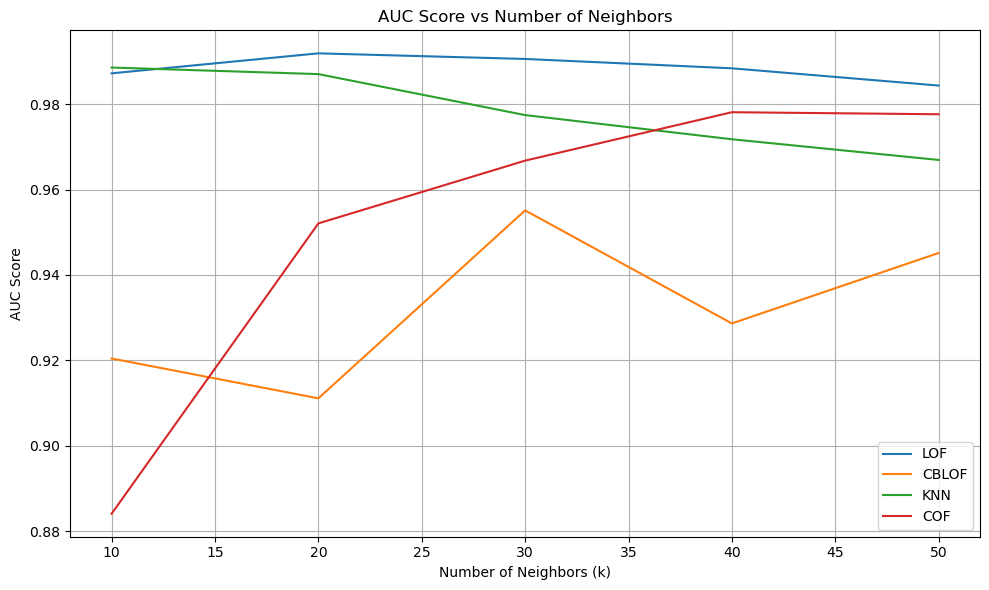

In [17]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = [10,20,30,40,50]
accuracy_scores_lof = []
accuracy_scores_cblof = []
accuracy_scores_knn = []
accuracy_scores_cof = []

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    lof_pred = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)

    auc_scores_lof.append(auc_lof)
    accuracy_lof = accuracy_score(y, lof_pred)
    accuracy_scores_lof.append(accuracy_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    cof_pred = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)

    auc_scores_cof.append(auc_cof)
    accuracy_cof = accuracy_score(y, cof_pred)
    accuracy_scores_cof.append(accuracy_cof)


    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    cblof_pred = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)

    auc_scores_cblof.append(auc_cblof)
    accuracy_cblof = accuracy_score(y, cblof_pred)
    accuracy_scores_cblof.append(accuracy_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    knn_pred = knn_model.labels_
    auc_knn = roc_auc_score(y, y_scores_knn)

    auc_scores_knn.append(auc_knn)
    accuracy_knn = accuracy_score(y, knn_pred)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_acc_lof = np.mean(accuracy_scores_lof)
mean_acc_cblof = np.mean(accuracy_scores_cblof)
mean_acc_knn = np.mean(accuracy_scores_knn)
mean_acc_cof = np.mean(accuracy_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)

print("KNN acc",mean_acc_knn)
print("LOF acc",mean_acc_lof)
print("CBLOF acc",mean_acc_cblof)
print("COF acc",mean_acc_cof)



KNN auc 0.9783318439082516
LOF auc 0.9884629133154602
CBLOF auc 0.9320971105153409
COF auc 0.9517307119451892
KNN acc 0.901338488994646
LOF acc 0.9013979773944081
CBLOF acc 0.9007436049970258
COF acc 0.9009220701963117
